In [ ]:
pip install highlight-text

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from highlight_text import fig_text
import urllib

In [ ]:
statistics=["Appearances" ,"Goals" , "Assists" ,"Chances created"]
kdb=[42,10,28,60]
bruno=[45,12,11,80]
odegaard=[45,12,11,80]

In [ ]:
df=pd.DataFrame({"stats": statistics,
                 "KDB":kdb,
                  "Bruno":bruno,
                  "Odegaard" : odegaard})
                 # .set_index("statistics)

In [ ]:
df.set_index("stats",inplace=True)

In [ ]:
df

,KDB,Bruno,Odegaard
stats,,,
Appearances,42,45,45
Goals,10,12,12
Assists,28,11,11
Chances created,60,80,80


In [ ]:
player_images=["169200.png","422685.png","534670.png" ]
background_colors=["#dceff5","#d6c3c4","#f5cfba" ]
#https://images.fotmob.com/image_resources/playerimages/169200.png

In [ ]:
def ax_logo(player_id, ax):
    '''
    Plots the picture of a player at a specific axes.
    Args:
        Player_id (int): the id of the player according to Fotmob.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/playerimages/'
    player_url=f'{fotmob_url}{player_id}'
    player_image= Image.open(urllib.request.urlopen(player_url))
    ax.imshow(player_image)
    #ax.set_facecolor(background_color)
    ax.axis('off')
    return ax

In [ ]:
df.iloc[0]#.max()

KDB         42
Bruno       45
Odegaard    45
Name: Appearances, dtype: int64

In [ ]:
#dfe8df"

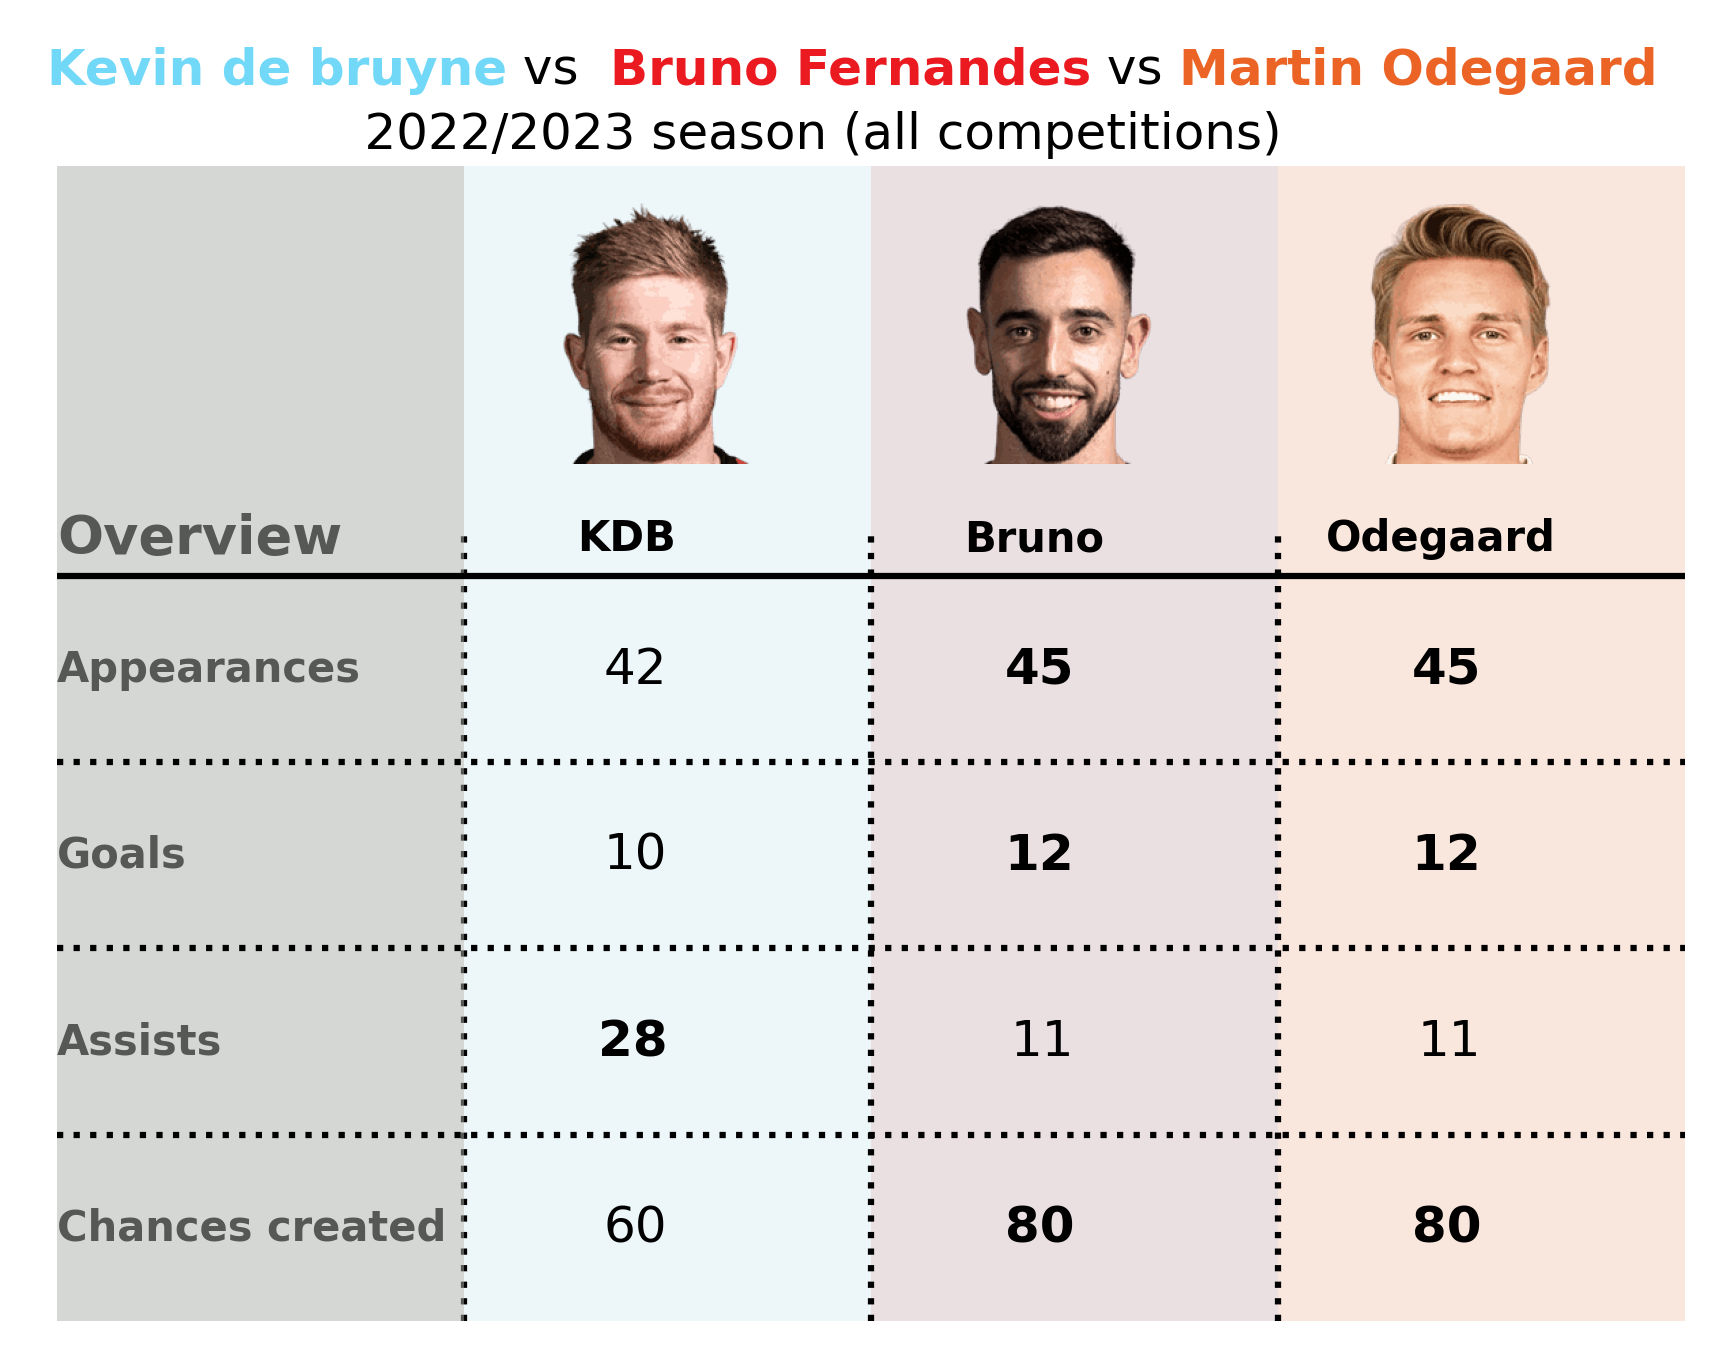

In [ ]:
nrows,ncols=df.shape

fig = plt.figure(figsize=(7,nrows+1), dpi=300, facecolor="white" )#="#dceff5")
ax = plt.subplot(facecolor="#ffffff")
ax.set_xlim(0,ncols+1)
ax.set_ylim(0,nrows+2.2)

for i, stat in enumerate(df.index[::-1]):
    #print(i, stat)
    ax.annotate(
            xy=(0, i+0.5),
                text=f"{stat}",
                ha="left",
                va='center', weight="bold" )

ax.annotate(
            xy=(0, nrows+0.2),
            text="Overview",
            ha="left", size=13,
            va='center', weight="bold" )

for i in range(nrows):
    for j,col in enumerate(df.columns):
        value=df[col][nrows-i-1]
        weight="normal"
        if value==df.iloc[nrows-i-1].max():
            weight="bold"

        ax.annotate(xy=(j+1.5,i+0.5),size=12,
                    text=f"{value}",ha="right",va="center", weight=weight )


#images
# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([1.1,4.5])
ax_point_2 = DC_to_NFC([ 1.8,5.9])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])

for i,player_image in enumerate(player_images):

    ax_coords = DC_to_NFC([i+1.1,nrows+0.6])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(player_image, flag_ax)

"""for  i, name in enumerate(["Overview"]+list(df.columns) ):
    size=10
    ha="center"
    if i==0:
        size=12
        ha="right"
    ax.annotate(xy=(i+0.5,4),
                    text=f"{name}", weight="bold",ha=ha,va="center", size=size)"""


#player name
for  i, name in enumerate(df.columns):
    ax.annotate(xy=(i+1.4,nrows+0.2),
                    text=f"{name}", weight="bold",ha=ha,va="center", size=size)

#ax.plot([0, 1+nrows], [0.4+nrows,0.4+ nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([0, 1+nrows], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
for i in range(1,nrows):
    ax.plot([0, 1+nrows], [i, i], lw=1.5, marker='', zorder=4,color='black', ls=':')

#column lines
for i in range(1,ncols+1):
    ax.plot([i,i], [0, 1.25+ncols], lw=1.5, marker='', zorder=3,color='black', ls=':')


#fill between
for i in range(1,ncols+1):
    ax.fill_between(
        x=[i,i+1],
        y1=0,
        y2=ax.get_ylim()[1],
        color=f"{background_colors[i-1]}",
        alpha=0.5,
        ec='None'
        )

ax.fill_between(
        x=[0,1],
        y1=0,
        y2=ax.get_ylim()[1]+1,
        color=f"#abb0ab",
        alpha=0.5,
        ec='None', zorder=3
        )


#header and logo
fig_text(
    x = 0.12, y = 0.96,
    s = "<Kevin de bruyne> vs  <Bruno Fernandes> vs <Martin Odegaard>\n                    2022/2023 season (all competitions)",
    color = "black",
    size = 12,
    highlight_textprops = [
        {"color": "#72d8f7","weight":"bold"},
        {"color": "#eb1a21","weight":"bold"},
        {"color": "#eb6426","weight":"bold"}
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)

ax.set_axis_off()